## Employee Attrition Prediction

The IBM HR Analytics Employee Attrition & Performance dataset is a large dataset that contains a plethora of information about employees at a fictitious company. It contains a wide range of demographic, work-related, and performance-related  characteristics that can be used to investigate the factors that influence employee attrition and job performance.



In [1]:
#IMPORT LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

#import the necessary modelling algorithm
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

#model(training & testing)
from sklearn.model_selection import train_test_split

#preprocess.
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import accuracy_score

import tensorflow as tf
import random as rn

In [2]:
ibm=pd.read_csv('C:\\Users\\darsh\\Downloads\\ML Scripts\\IBM-Employee-Attrition.csv',header=0)
ibm.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
#Missing Values
ibm.info()  # no null or NAN values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [4]:
ibm.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [5]:
ibm.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In all we have 34 features consisting of both the categorical as well as the numerical features. The target variable is the 'Attrition' of the employee which can be either a Yes or a No.

In [6]:
#Univariate Analysis
ibm.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


C:\Users\darsh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\darsh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\darsh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

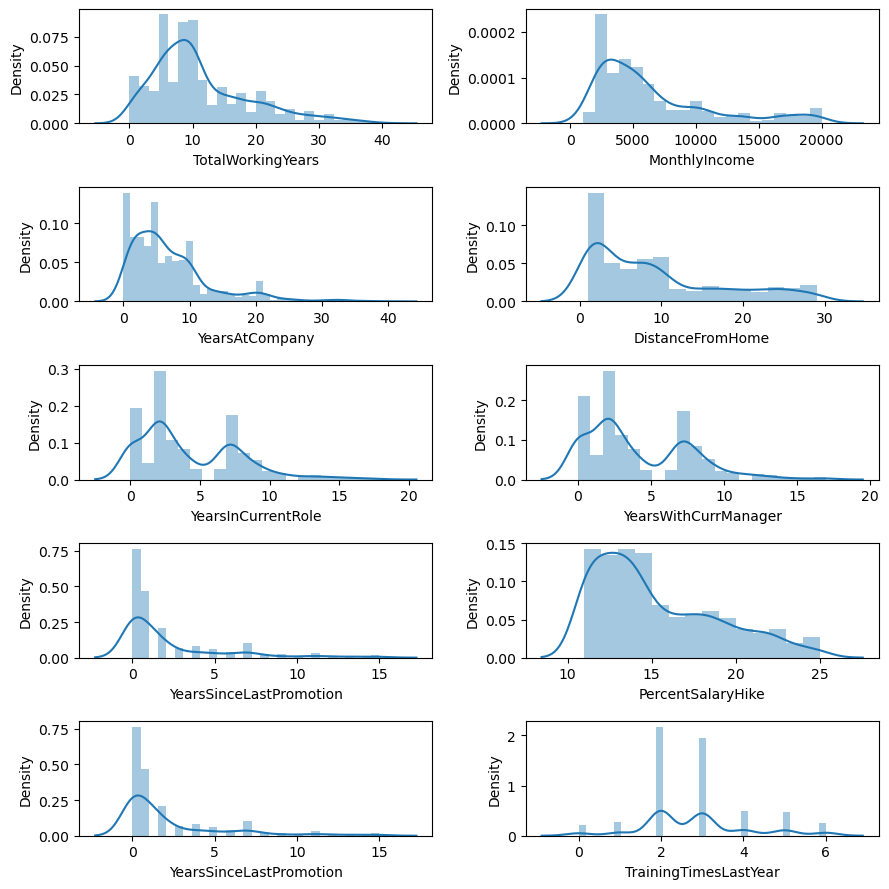

In [7]:
#Analysis using subplots
fig,ax = plt.subplots(5,2, figsize=(9,9))                
sns.distplot(ibm['TotalWorkingYears'], ax = ax[0,0]) 
sns.distplot(ibm['MonthlyIncome'], ax = ax[0,1]) 
sns.distplot(ibm['YearsAtCompany'], ax = ax[1,0]) 
sns.distplot(ibm['DistanceFromHome'], ax = ax[1,1]) 
sns.distplot(ibm['YearsInCurrentRole'], ax = ax[2,0]) 
sns.distplot(ibm['YearsWithCurrManager'], ax = ax[2,1]) 
sns.distplot(ibm['YearsSinceLastPromotion'], ax = ax[3,0]) 
sns.distplot(ibm['PercentSalaryHike'], ax = ax[3,1]) 
sns.distplot(ibm['YearsSinceLastPromotion'], ax = ax[4,0]) 
sns.distplot(ibm['TrainingTimesLastYear'], ax = ax[4,1]) 
plt.tight_layout()
plt.show()

In [8]:
le = LabelEncoder()
for col in ibm.columns:
    if ibm[col].dtype == 'object':
        ibm[col] = le.fit_transform(ibm[col])
ibm.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,...,4,80,1,6,3,3,2,2,2,2


The feature Selection is one of the main steps of the preprocessing phase as the features which we choose directly effects the model performance. While some of the features seem to be less useful in terms of the context; others seem to equally useful. The better features we use the better our model will perform.

We can also use the Recusrive Feature Elimination technique (a wrapper method) to choose the desired number of most important features. The Recursive Feature Elimination (or RFE) works by recursively removing attributes and building a model on those attributes that remain.

It uses the model accuracy to identify which attributes (and combination of attributes) contribute the most to predicting the target attribute.

In [9]:
#Dropping Unneccesary Columns
ibm.drop(['BusinessTravel','DailyRate','EmployeeCount','EmployeeNumber',
          'HourlyRate','MonthlyRate','NumCompaniesWorked','Over18','StandardHours',
          'StockOptionLevel','TrainingTimesLastYear'],axis=1,inplace=True)

In this code snippet, the ibm dataset is being modified by dropping several columns using the drop() function. The dropped columns are:

BusinessTravel: It may not be relevant for predicting employee attrition or performance as it just indicates the frequency of travel of employees.

DailyRate, HourlyRate, MonthlyRate: These columns contain information about employee's pay rate, which may not be directly related to employee attrition or performance.

EmployeeCount, EmployeeNumber, Over18, StandardHours: These columns contain information that is constant for all employees, so they do not provide any useful information for predicting employee attrition or performance.

NumCompaniesWorked: This column contains information about the number of companies an employee has worked for prior to joining the current company. While it may be relevant, it is also highly correlated with other columns such as TotalWorkingYears and JobInvolvement, so it may not be necessary to keep it.

StockOptionLevel, TrainingTimesLastYear: These columns may not have a significant impact on employee attrition or performance.

C:\Users\darsh\AppData\Local\Temp\ipykernel_20576\2502967816.py:18: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  sns.heatmap(ibm[corr_features].corr(), cmap='coolwarm', annot=True, fmt='.2f', square=True)


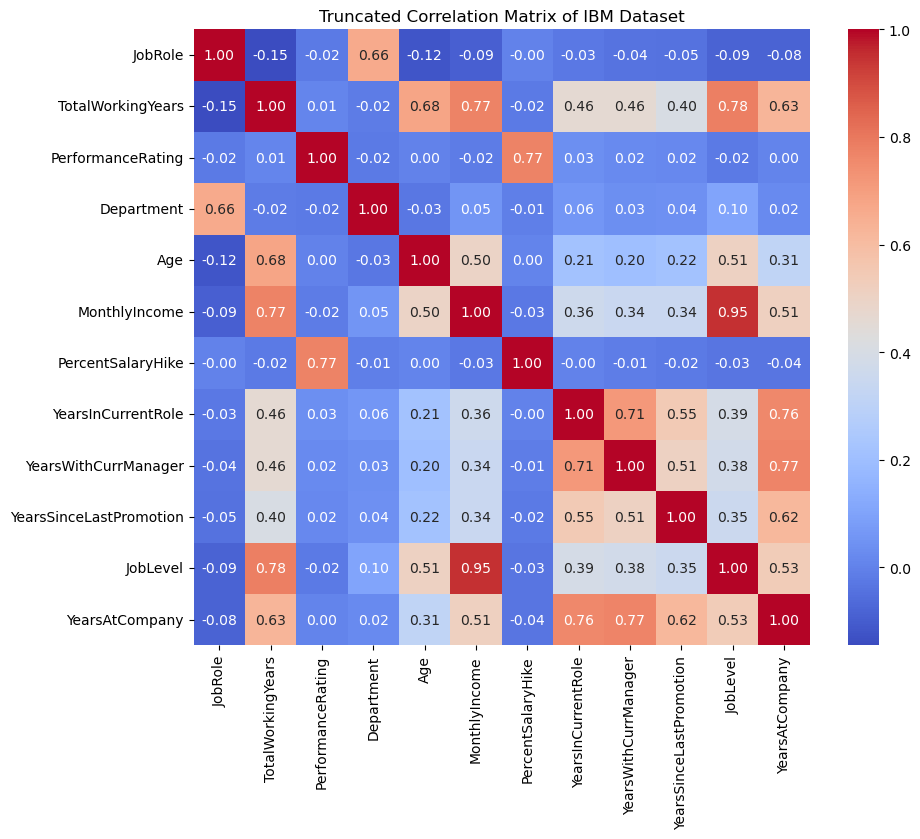

In [10]:
corr_matrix = ibm.corr()

# Set the threshold for selecting highly correlated features
threshold = 0.5

# Select the most highly correlated features
corr_features = set()
for i in range(len(corr_matrix.columns)):
    for j in range(len(corr_matrix.index)):
        if abs(corr_matrix.iloc[i, j]) > threshold and i != j:
            colname_i = corr_matrix.columns[i]
            colname_j = corr_matrix.index[j]
            corr_features.add(colname_i)
            corr_features.add(colname_j)

# Create the truncated heatmap
plt.figure(figsize=(10,8))
sns.heatmap(ibm[corr_features].corr(), cmap='coolwarm', annot=True, fmt='.2f', square=True)
plt.title('Truncated Correlation Matrix of IBM Dataset')
plt.show()


SOME INFERENCES FROM THE ABOVE HEATMAP

Self relation ie of a feature to itself is equal to 1 as expected.

JobLevel is highly related to Age as expected as aged employees will generally tend to occupy higher positions in the company.

MonthlyIncome is very strongly related to joblevel as expected as senior employees will definately earn more.

Also note that TotalWorkingYears is highly related to JobLevel which is expected as senior employees must have worked for a larger span of time.

YearsWithCurrManager is highly related to YearsAtCompany.

YearsAtCompany is related to YearsInCurrentRole.

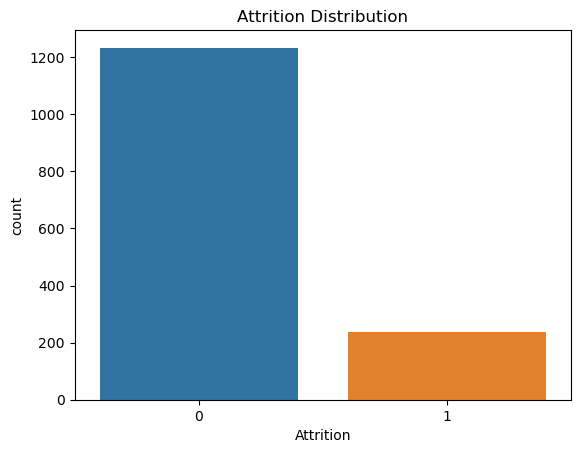

In [11]:
sns.countplot(x='Attrition', data=ibm)
plt.title('Attrition Distribution')
plt.show()

Note that the number of observations belonging to the 'No' category is way greater than that belonging to 'Yes' category. Hence we have skewed classes and this is a typical example of the 'Imbalanced Classification Problem'. To handle such types of problems we need to use the over-sampling or under-sampling techniques.


# STANDARDIZATION

In [14]:
# Feature Scaling.
# I have used the StandardScaler to scale the data.

scaler=StandardScaler()
scaled_ibm=scaler.fit_transform(ibm.drop('Attrition',axis=1))
X=scaled_ibm
Y=ibm['Attrition']

In [15]:
#Splitting the data into training and validation sets
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=49)

In an imbalanced dataset the main problem is that the data is highly skewed ie the number of observations of certain class is more than that of the other. Therefore what we do in this approach is to either increase the number of observations corressponding to the minority class (oversampling) or decrease the number of observations for the majority class (undersampling).

Note that in our case the number of observations is already pretty low and so oversampling will be more appropriate.

Below I have used an oversampling technique known as the SMOTE(Synthetic Minority Oversampling Technique) which randomly creates some 'Synthetic' instances of the minority class so that the net observations of both the class get balanced out.

One thing more to take of is to use the SMOTE before the cross validation step; just to ensure that our model does not overfit the data; just as in the case of feature selection.

In [16]:
from imblearn.over_sampling import SMOTE
oversampler=SMOTE(random_state=42)
x_train_smote,  y_train_smote = oversampler.fit_resample(x_train,y_train)

# RANDOM-FOREST CLASSIFIER

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
# create an instance of RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

# fit the model on the training data
rfc.fit(x_train_smote, y_train_smote)

# make predictions on the test data
y_pred = rfc.predict(x_test)

# evaluate the performance of the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8369565217391305
              precision    recall  f1-score   support

           0       0.85      0.97      0.91       304
           1       0.59      0.20      0.30        64

    accuracy                           0.84       368
   macro avg       0.72      0.59      0.61       368
weighted avg       0.81      0.84      0.80       368



In [29]:
#Identify Important Features
# check Important features
feature_importances_df=pd.DataFrame({"feature":list(X.columns),"importance":classifier.feature_importances_).sort_values("importance",ascending=False)
# Display
feature_importances_df

SyntaxError: closing parenthesis ')' does not match opening parenthesis '{' (4179072488.py, line 3)

Random forest is an ensemble learning method that combines multiple decision trees and uses a majority vote to make predictions. This can help to reduce overfitting and improve the accuracy of the model.Random forest can also handle a larger number of features than decision tree, which can be useful for datasets with many features.Actually i have also used decision tree before it give me 78% accuracy.hence,Random Forest is better than decision tree.

# DECISION TREE

In [21]:
from sklearn.tree import DecisionTreeClassifier

# Create an instance of DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)

# Fit the model to the training data
dt.fit(x_train, y_train)

# Make predictions on the test data
y_pred = dt.predict(x_test)

# Evaluate the performance of the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))



Accuracy: 0.7771739130434783
              precision    recall  f1-score   support

           0       0.87      0.87      0.87       304
           1       0.36      0.36      0.36        64

    accuracy                           0.78       368
   macro avg       0.61      0.61      0.61       368
weighted avg       0.78      0.78      0.78       368



# ANN

In [22]:
np.random.seed(42)
rn.seed(42)
tf.random.set_seed(42)

In [27]:
#BUILDING KERAS MODEL
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from tensorflow import keras
from tensorflow.keras import layers


np.random.seed(42)
rn.seed(42)
tf.random.set_seed(42)
model = keras.Sequential([
    layers.Dense(32, activation='relu', input_shape=[x_train.shape[1]]),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(lr=0.01),loss='binary_crossentropy',metrics=['accuracy'])
History=model.fit(x_train_smote,y_train_smote,validation_data=(x_test,y_test),epochs=9,verbose=1)

Epoch 1/9
59/59 [==============================] - 1s 9ms/step - loss: 0.4973 - accuracy: 0.7481 - val_loss: 0.5346 - val_accuracy: 0.7663
Epoch 2/9
59/59 [==============================] - 0s 5ms/step - loss: 0.3820 - accuracy: 0.8186 - val_loss: 0.5244 - val_accuracy: 0.7880
Epoch 3/9
59/59 [==============================] - 0s 5ms/step - loss: 0.3181 - accuracy: 0.8638 - val_loss: 0.5532 - val_accuracy: 0.7799
Epoch 4/9
59/59 [==============================] - 0s 5ms/step - loss: 0.2775 - accuracy: 0.8854 - val_loss: 0.5932 - val_accuracy: 0.7690
Epoch 5/9
59/59 [==============================] - 0s 4ms/step - loss: 0.2525 - accuracy: 0.8956 - val_loss: 0.5811 - val_accuracy: 0.7636
Epoch 6/9
59/59 [==============================] - 0s 5ms/step - loss: 0.2277 - accuracy: 0.9128 - val_loss: 0.6362 - val_accuracy: 0.7799
Epoch 7/9
59/59 [==============================] - 0s 5ms/step - loss: 0.1824 - accuracy: 0.9252 - val_loss: 0.7221 - val_accuracy: 0.7527
Epoch 8/9
59/59 [==========

First we need to build a model. For this we use the Sequential model provided by the Keras which is nothing but a linear stack of layers.

Next we need to add the layers to our Sequential model. For this we use the model.add() function.

Note that for each layer we need to specify the number of units ( or the number of neurons) and also the activation function used by the neurons.

Note that activation function is used to model complex non-linear relationships and their are many choices. But generally it is preferred to use 'relu' function for the hidden layers and the 'sigmoid' or the 'logistic' function for the output layer. For a multi-class classification problem we can use the 'softmax' function as the activation function for the output layer.

Note that the first layer and ONLY the first layer expects the input dimensions in order to know the shape of the input numpy array.

Finally note that the number of units or neurons in the final layer is equal to the number of classes of the target variable. In other words for a 'n' class classification problem we shall have 'n' neurons in the output layer.

Each neuron represents a specific target class. The output of each neuron in the final layer thus represents the probability of given observation being classified to that target class. The observation is classified to the target class; the neuron corressponding to which has the highest value.

BREAKING IT DOWN
Now we need to compile the model. We have to specify the optimizer used by the model We have many choices like Adam, RMSprop etc.. Rfer to Keras doc for a comprehensive list of the optimizers available.

Next we need to specify the loss function for the neural network which we seek to minimize.

I have used the 'binary_crossentropy' loss function since this is a binary classification problem. For a multi-class classification problems we may use the 'categorical_crossentropy'.

Next we need to specify the metric to evaluate our models performance. Here I have used accuracy.

# EVALUTION

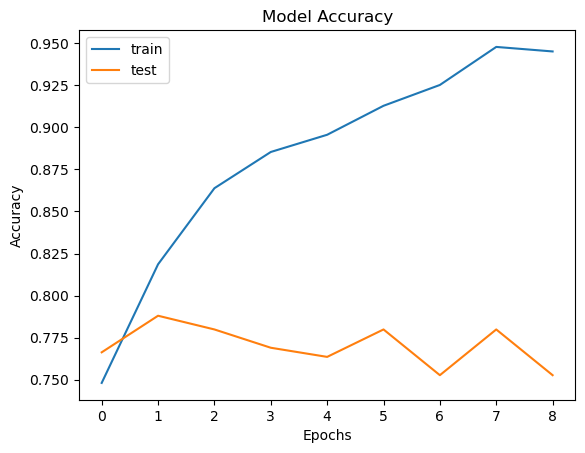

In [28]:
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()